In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Importe o dataset 

In [2]:
mnist = datasets.load_digits()

### Divida o conjunto de dados em treino e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [5]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [6]:
print("training data points: {}".format(len(trainLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1212
testing data points: 450


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [93]:
kVals = range(1, 30, 2)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [94]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


### Imprima em um gráfico os valores da acurácia em função de k

In [95]:
accuracies

[0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9925925925925926,
 0.9851851851851852,
 0.9851851851851852,
 0.9777777777777777,
 0.9703703703703703,
 0.9777777777777777,
 0.9703703703703703,
 0.9703703703703703]

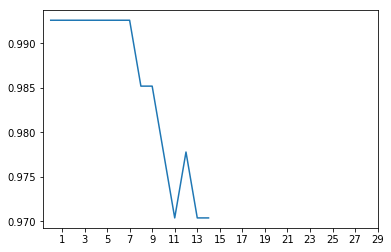

In [101]:
plt.plot(accuracies);
plt.xticks(kVals);

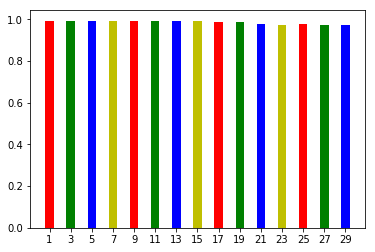

In [87]:
plt.bar(kVals,accuracies,color='rgby');
plt.xticks(kVals);
plt.show();

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizabdo as métricas de classificação disponíveis no sklearn

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

In [68]:
import sklearn.metrics as metrics

In [71]:
model = KNeighborsClassifier(n_neighbors=13, metric='euclidean');
model.fit(trainData, trainLabels);
pred = model.predict(testData);

In [90]:
metrics.confusion_matrix(testLabels,pred)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 45,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  0, 46]])

In [76]:
metrics.accuracy_score(testLabels,pred)

0.98

In [78]:
metrics.f1_score(testLabels,pred,average='weighted')

0.9799465085381164

In [82]:
print(metrics.classification_report(testLabels,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.93      1.00      0.96        37
           2       1.00      1.00      1.00        38
           3       1.00      0.98      0.99        46
           4       1.00      1.00      1.00        55
           5       0.98      0.95      0.97        59
           6       0.98      1.00      0.99        45
           7       0.98      1.00      0.99        41
           8       0.97      0.92      0.95        38
           9       0.96      0.96      0.96        48

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

In [ ]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='',algorithm='kd_tree')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)